## covid-19 Data exploration from data set available by John hopkins CSSE

In [30]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry
#import plotly.express as px

# importing time series datasets of confirmed, recovered and deaths

In [31]:
dir_path = '.'
df_confirmed = pd.read_csv('time_series_19-covid-Confirmed.csv')
df_recovered = pd.read_csv("time_series_19-covid-Recovered.csv")
df_deaths = pd.read_csv("time_series_19-covid-Deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)



In [32]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [33]:
df_confirmed=df_confirmed.groupby(["Country"]).sum()
df_confirmed=df_confirmed.drop(columns=['Lat','Long'])
df_recovered=df_recovered.groupby(["Country"]).sum()
df_recovered=df_recovered.drop(columns=['Lat','Long'])
df_deaths=df_deaths.groupby(["Country"]).sum()
df_deaths=df_deaths.drop(columns=['Lat','Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
Albania,0,0,0,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
Algeria,0,0,0,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


# importing latest total deaths, confirmed and recovered dataset

In [34]:
df = pd.read_csv('03-21-2020.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df=df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


# extracting top 50 infected countries

In [35]:
top_affected_countries=df.sort_values(['Confirmed'],ascending=False)[:50]['Country'].values
top_affected_countries

array(['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France',
       'Korea, South', 'Switzerland', 'United Kingdom', 'Netherlands',
       'Belgium', 'Austria', 'Norway', 'Sweden', 'Denmark', 'Portugal',
       'Canada', 'Malaysia', 'Australia', 'Brazil', 'Japan', 'Czechia',
       'Israel', 'Ireland', 'Pakistan', 'Cruise Ship', 'Luxembourg',
       'Turkey', 'Chile', 'Poland', 'Greece', 'Finland', 'Ecuador',
       'Qatar', 'Iceland', 'Indonesia', 'Singapore', 'Thailand',
       'Saudi Arabia', 'Slovenia', 'Romania', 'India', 'Peru',
       'Philippines', 'Estonia', 'Russia', 'Bahrain', 'Egypt',
       'South Africa'], dtype=object)

In [36]:
np.savetxt('top_affected_countries.txt',top_affected_countries, delimiter=" ", fmt="%s")

In [37]:
df_confirmed_top=df_confirmed.loc[top_affected_countries,:]
df_recovered_top=df_recovered.loc[top_affected_countries,:]
df_deaths_top=df_deaths.loc[top_affected_countries,:]
df_confirmed_top.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305
Italy,0,0,0,0,0,0,0,0,0,2,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578
US,1,1,2,2,5,5,5,5,5,7,...,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489
Spain,0,0,0,0,0,0,0,0,0,0,...,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374
Germany,0,0,0,0,0,1,4,4,4,5,...,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213


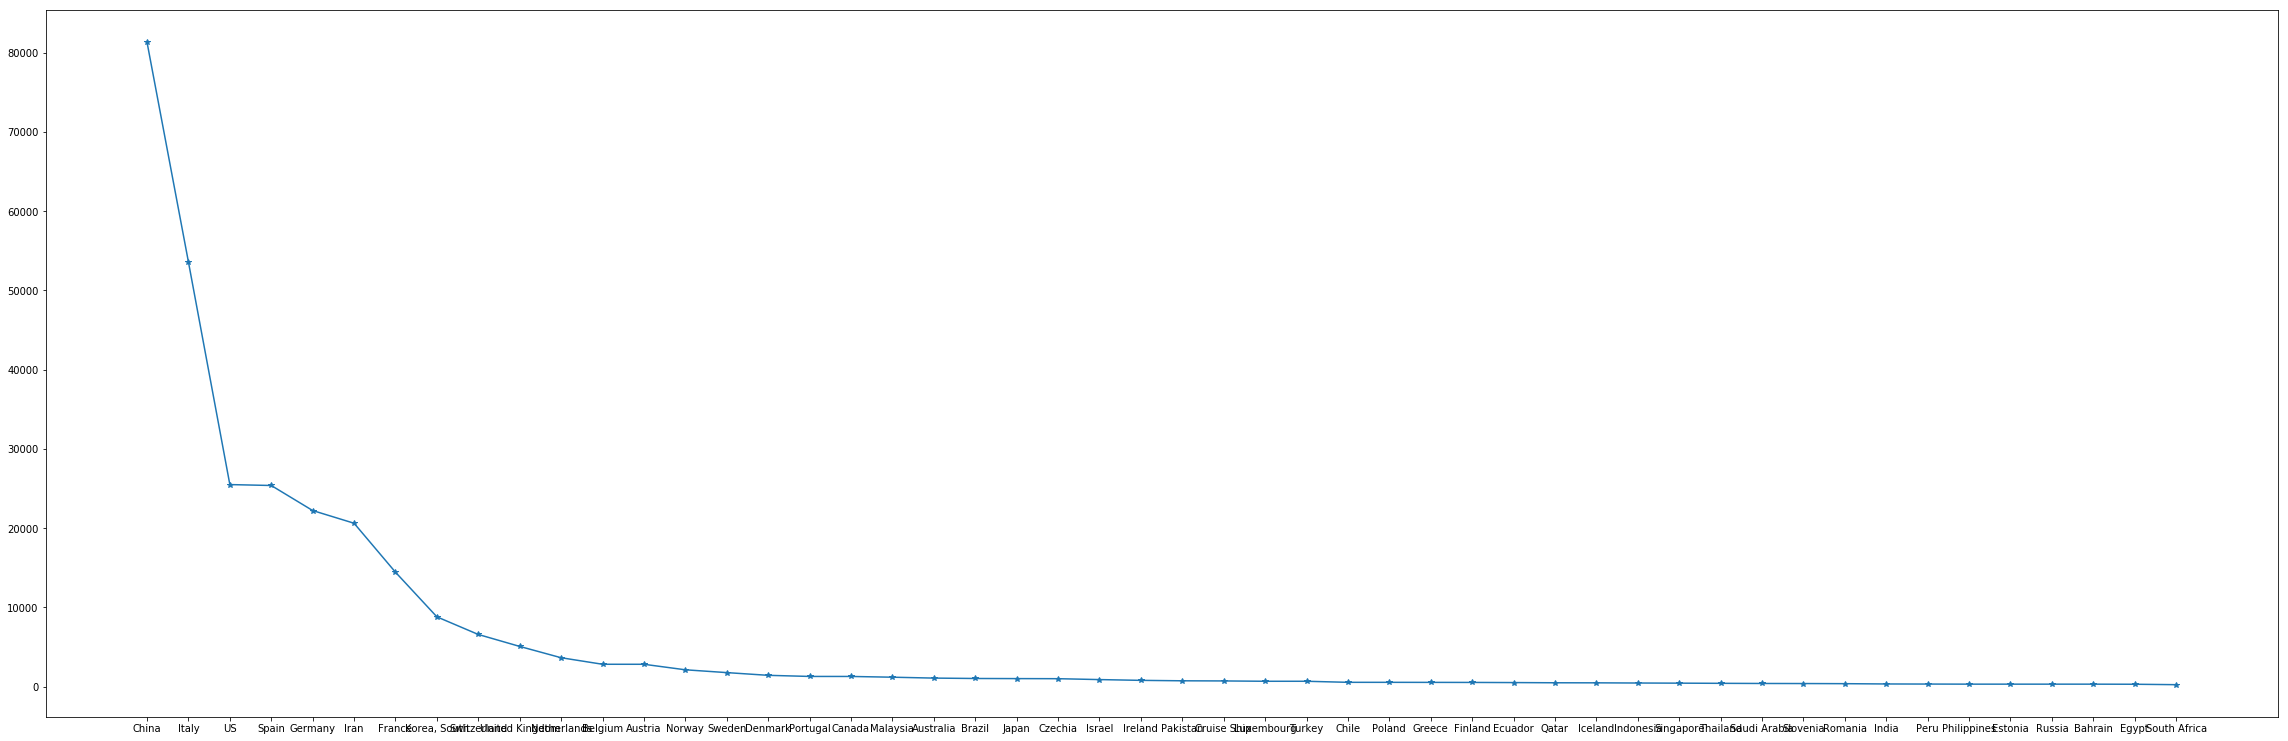

In [38]:
plt.figure(figsize=(40,13))
plt.plot(df_confirmed_top['3/21/20'],'*-')

In [39]:
confirmed_mat=df_confirmed_top.as_matrix()
deaths_mat=df_deaths_top.as_matrix()
recovered_mat=df_recovered_top.as_matrix()

/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


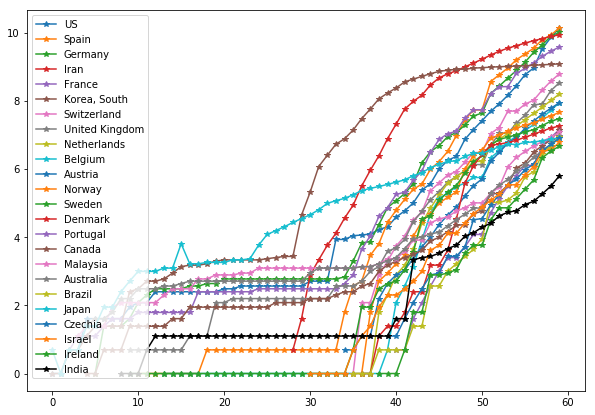

In [40]:
plt.figure(figsize=(10,7))
[plt.plot(np.log(confirmed_mat[i,:]),'*-',label=top_affected_countries[i]) for i in range(2,25)]
plt.plot(np.log(confirmed_mat[42,:]),'k*-',label=top_affected_countries[42])
plt.legend()

In [41]:
def plot_cases(confirmed_mat,thr=5):
    plt.figure(figsize=(10,10))
    i=42
    idx=np.where(confirmed_mat[i,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k*-',label=top_affected_countries[i])
    for i in range(0,15):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    i=42
    idx=np.where(confirmed_mat[i,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k*-',label=top_affected_countries[i])
    for i in range(15,28):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    i=42
    idx=np.where(confirmed_mat[i,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k*-',label=top_affected_countries[i])
    for i in range(28,40):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    for i in range(40,50):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    i=42
    idx=np.where(confirmed_mat[i,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()

confirmed_cases


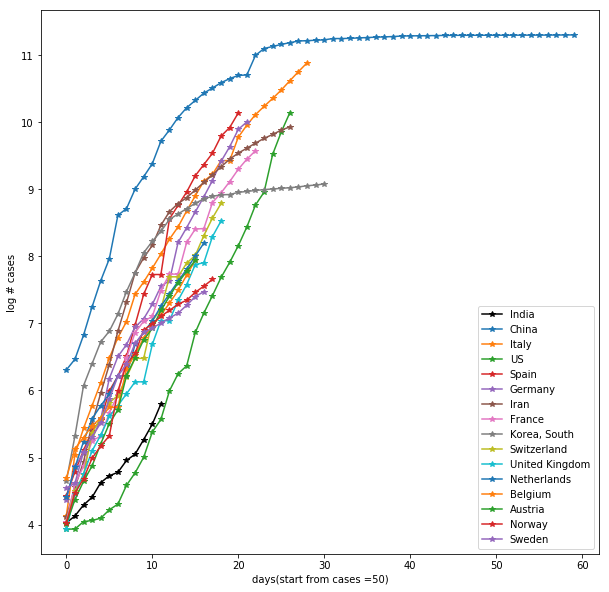

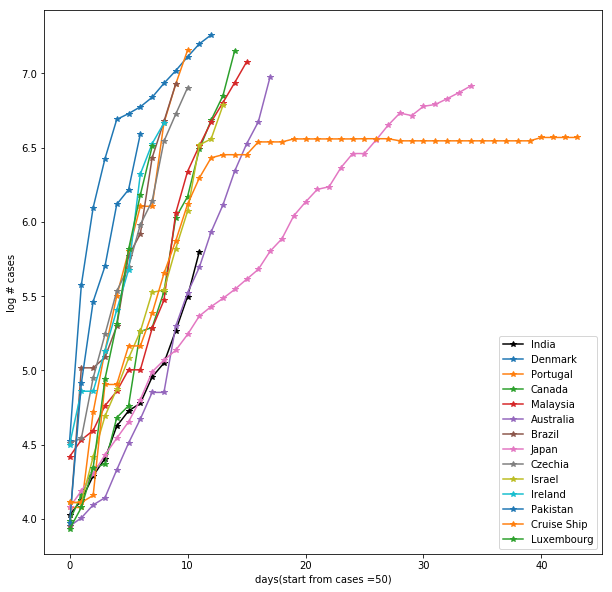

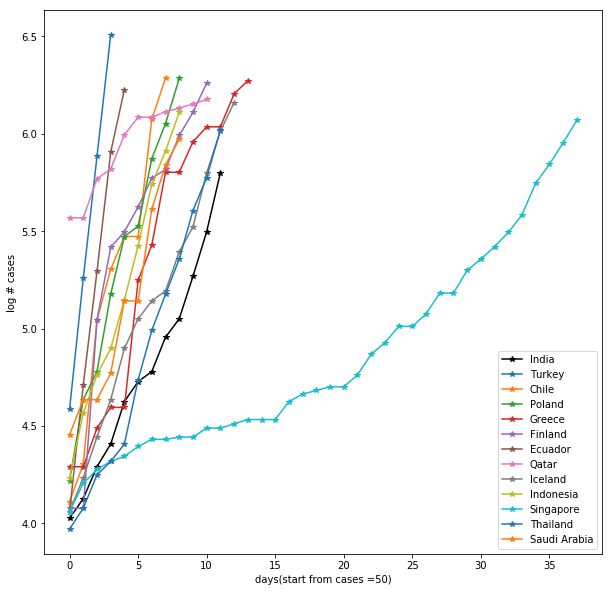

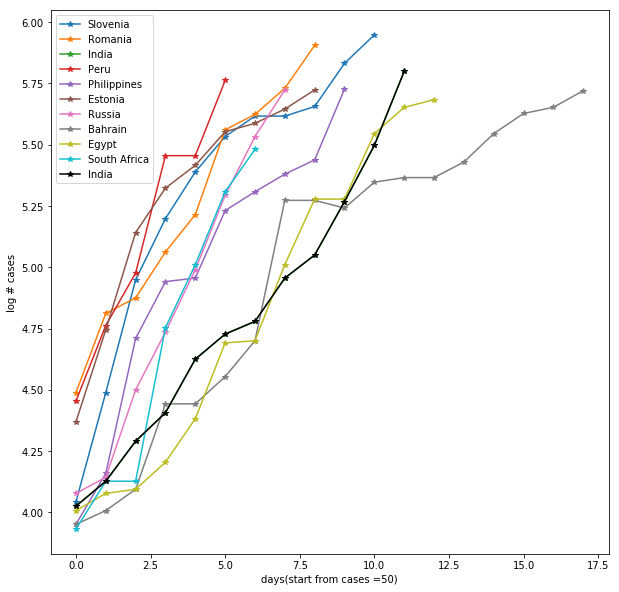

In [42]:
%matplotlib inline
print('confirmed_cases')
plot_cases(confirmed_mat,thr=50)

death_cases


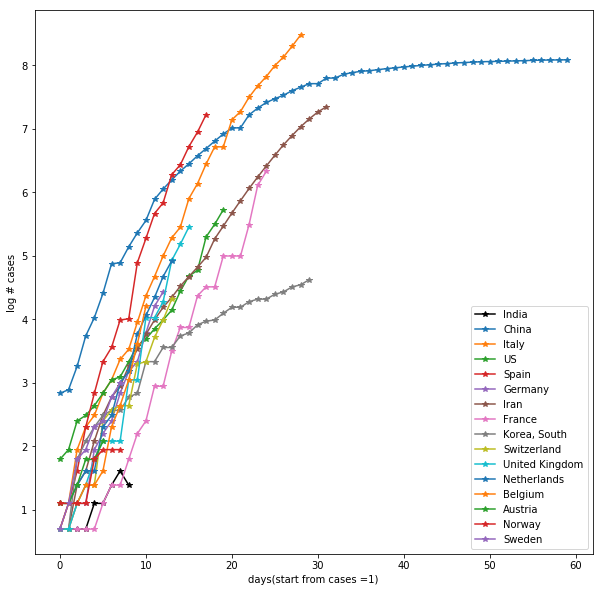

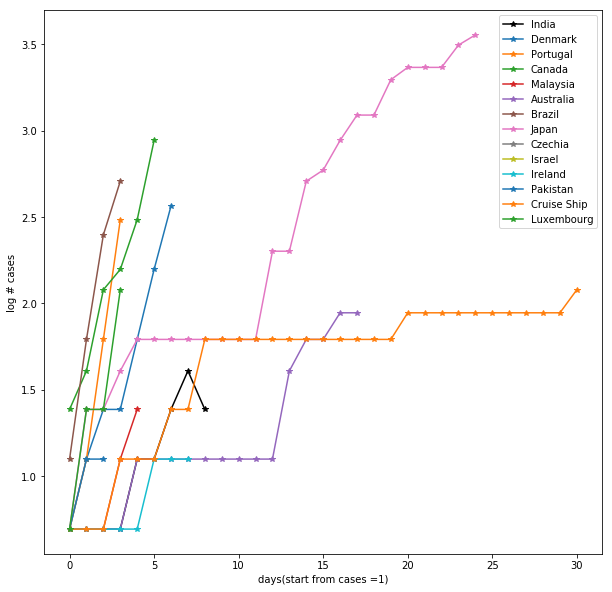

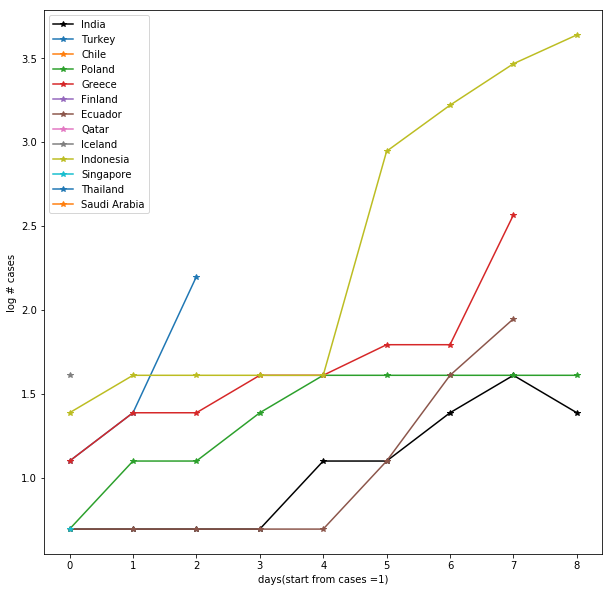

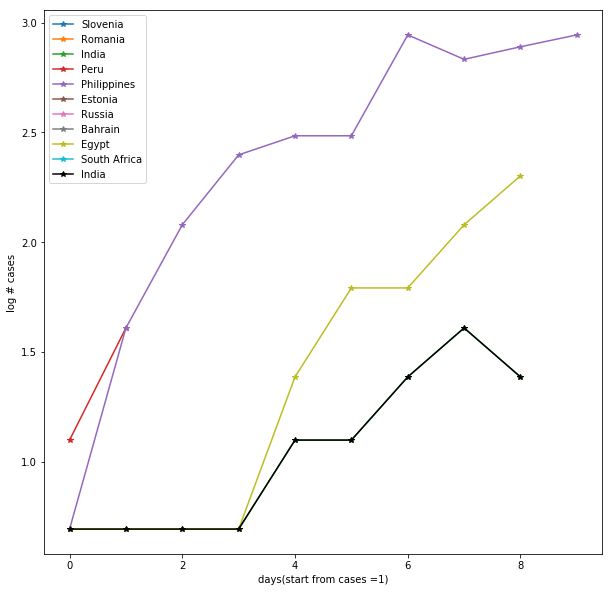

In [43]:
print('death_cases')
plot_cases(deaths_mat,thr=1)

recovered_cases


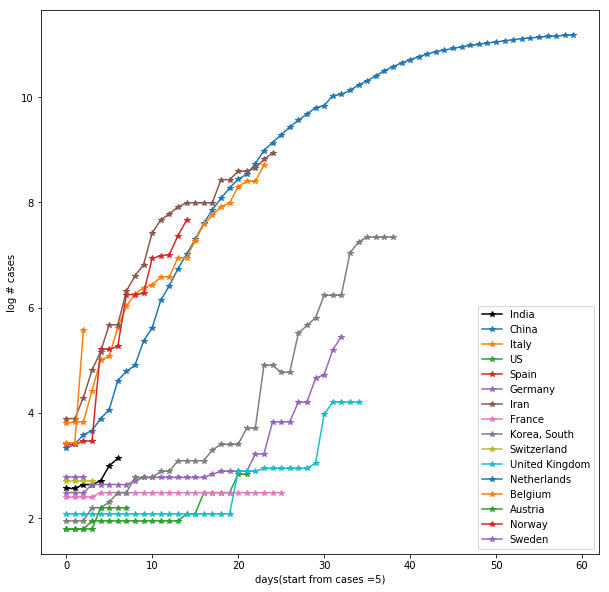

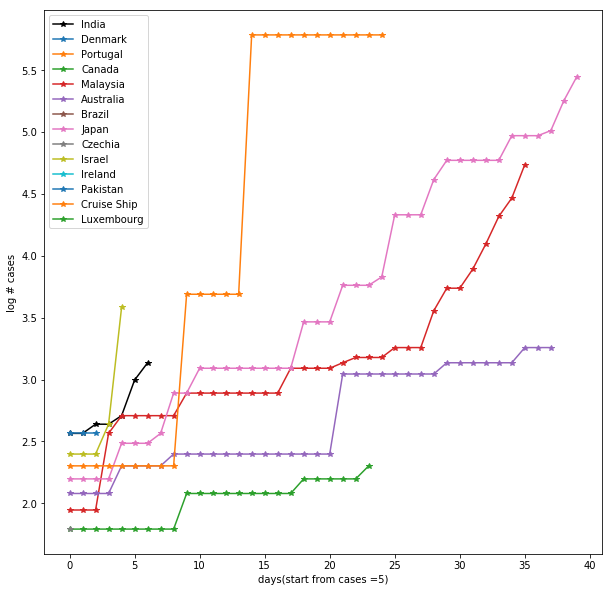

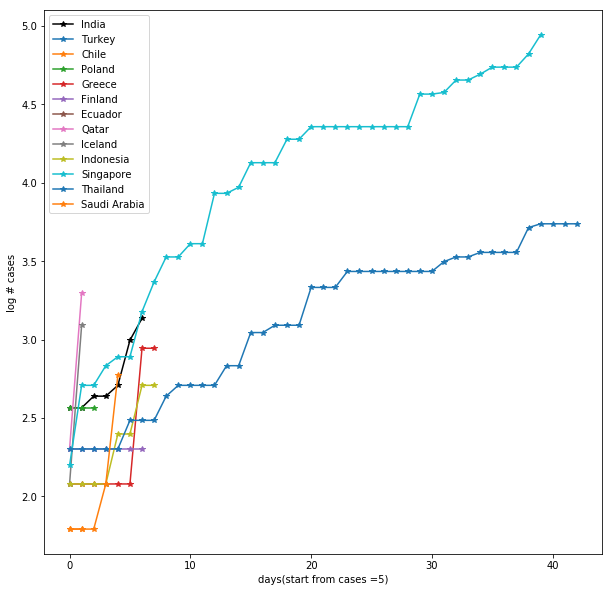

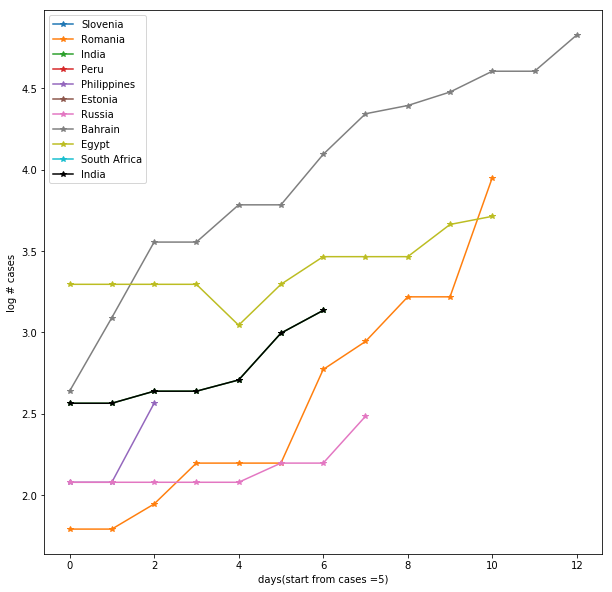

In [44]:
print('recovered_cases')
plot_cases(recovered_mat,thr=5)

# according to the above plots visually:
1. The slope of india for confirmed cases seems not bad, but Singapore shows exceptionally lower slope.
2. The slope of india for recovered cases also seems not bad, though data is very less for it, but Italy, Iran, Bahrain, Romania show relatively higher slope w.r.t other countries.

# logarithmic change: log(1-dayjump)


(0.1612491785204888, 0.16332505610329962)

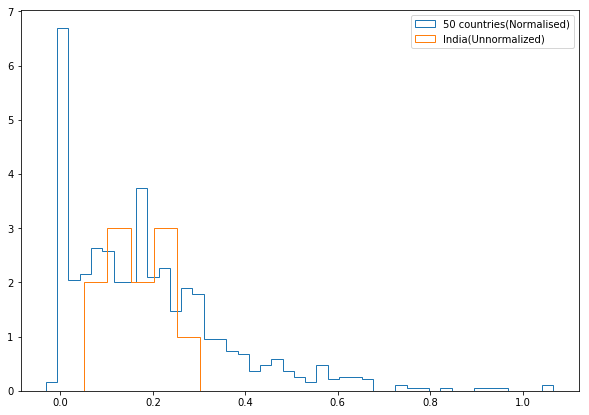

In [261]:
thr=50
plt.figure(figsize=(10,7))
exp_rate=np.array([1])
for i in range(0,50):
    idx=np.where(confirmed_mat[i,:]>=thr )[0]
    exp_rate=np.append(exp_rate,np.divide(confirmed_mat[i,idx[1:]],confirmed_mat[i,idx[0:-1]]))
plt.hist(np.log(exp_rate),45,histtype='step',density=True,label="50 countries(Normalised)")
i=42
idx=np.where(confirmed_mat[i,:]>=thr )[0]
exp_rate=np.divide(confirmed_mat[i,idx[1:]],confirmed_mat[i,idx[0:-1]])
plt.hist(np.log(exp_rate),5,histtype='step',density=False,label="India(Unnormalized)")
plt.legend()
np.log(exp_rate).mean(),np.median(np.log(exp_rate))

# slope of log(#cases) v/s days

In [312]:
def calc_slopes(confirmed_mat,thr=3,guess=1):
    slopes=np.zeros(50)
    for i in range(50):
        idx=np.where(confirmed_mat[i,:]>=thr)[0]
        y = np.log(confirmed_mat[i,idx.T])
        if len(y)>0:
            x = np.arange(len(y))
            z = np.polyfit(x, y, guess)
            slopes[i]=z[0]
            p = np.poly1d(z)
        #fit = p(x)
    plt.figure()
    plt.hist(slopes,20,histtype='step')
    plt.xlabel('slope')
    plt.ylabel('count')
    print('mean,median = ',slopes.mean(),np.median(slopes))
    plt.figure(figsize=(30,10))
    plt.plot(slopes,'*-')
    plt.xticks(np.arange(0,50))
    plt.xlabel("Country")
    plt.ylabel("slope of log cases")
    plt.grid()
    
    return slopes

mean,median =  0.22474839021921444 0.21720393412131117


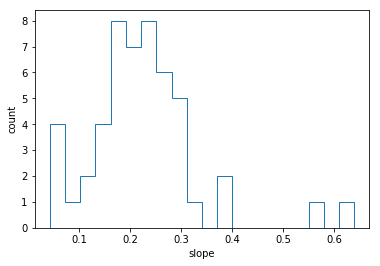

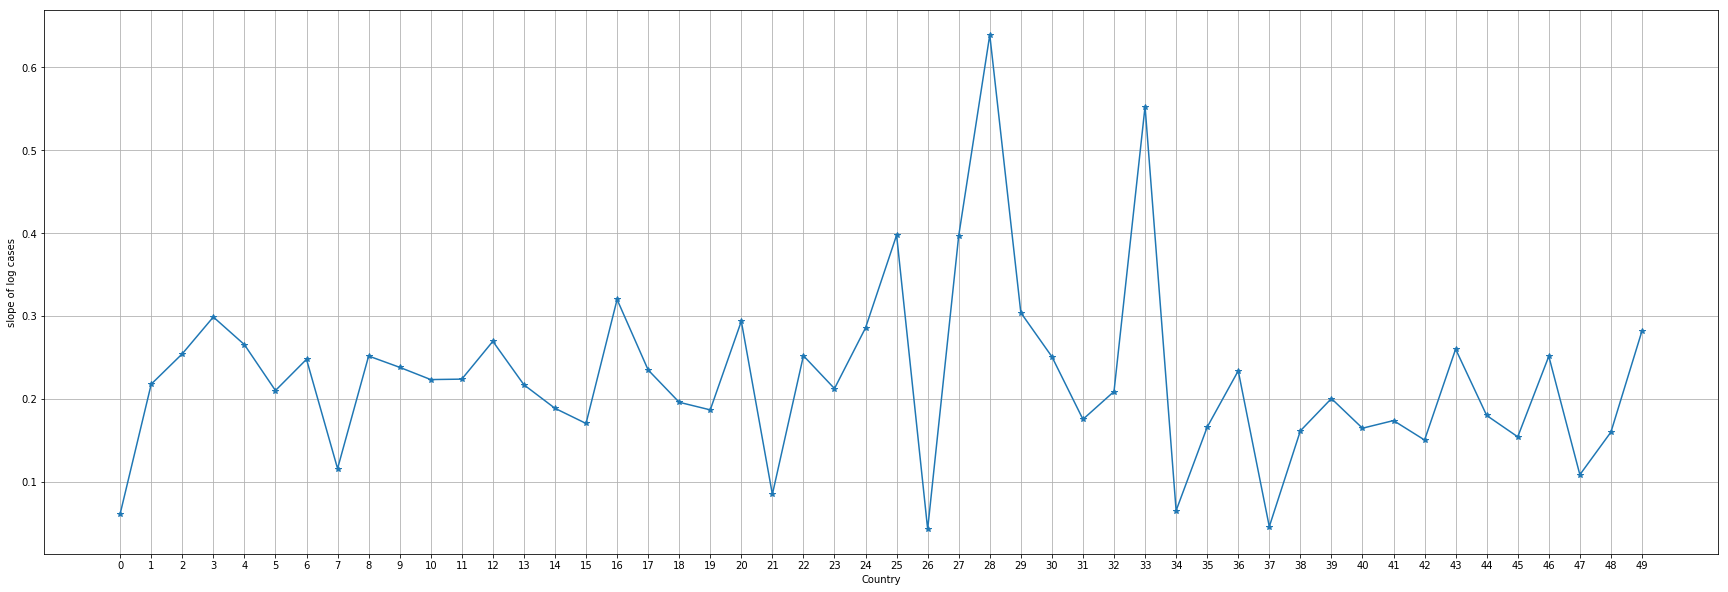

In [313]:
slopes=calc_slopes(confirmed_mat,thr=50)

In [238]:
# high confirmed cases spread rate countries
top_affected_countries[slopes>0.3], slopes[slopes>0.3],np.where(slopes>0.3),

(array(['Portugal', 'Pakistan', 'Luxembourg', 'Turkey', 'Chile', 'Ecuador'],
       dtype=object),
 array([0.31982136, 0.3975152 , 0.39682668, 0.63927577, 0.30388416,
        0.5528019 ]),
 (array([16, 25, 27, 28, 29, 33]),))

In [271]:
# low confirmed cases spread rate countries
top_affected_countries[slopes<0.1], slopes[slopes<0.1], np.where(slopes<0.1)

(array(['China', 'Japan', 'Cruise Ship', 'Qatar', 'Singapore'],
       dtype=object),
 array([0.06107447, 0.08455762, 0.04258437, 0.06492381, 0.04532251]),
 (array([ 0, 21, 26, 34, 37]),))

In [272]:
# current confirmed cases slope of india 
slopes[42]

0.15015114823738906

mean,median =  2.159884061500673 1.8059177222943381


array([8.78607419, 6.07189518, 1.74121909, 2.74174338, 3.2209658 ,
       7.05348531, 2.0564593 , 3.97306724, 1.52208919, 2.62171899,
       0.69314718, 4.14670948, 1.7339972 , 0.        , 2.77258872,
       0.        , 1.12495242, 1.82403969, 2.9201229 , 2.14131231,
       0.69314718, 3.61690791, 1.26208383, 1.61830696, 1.60943791,
       1.20363868, 4.1115896 , 0.        , 0.        , 1.79175947,
       2.56494936, 2.2956909 , 2.30258509, 1.09861229, 1.73952352,
       1.99975955, 1.77518715, 3.78555542, 2.74037494, 1.82007598,
       0.        , 2.17477167, 1.46990984, 0.        , 1.23289488,
       0.        , 1.0563312 , 3.49479052, 3.39073165, 0.        ])

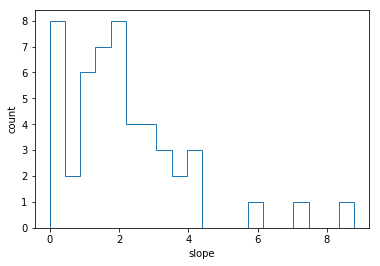

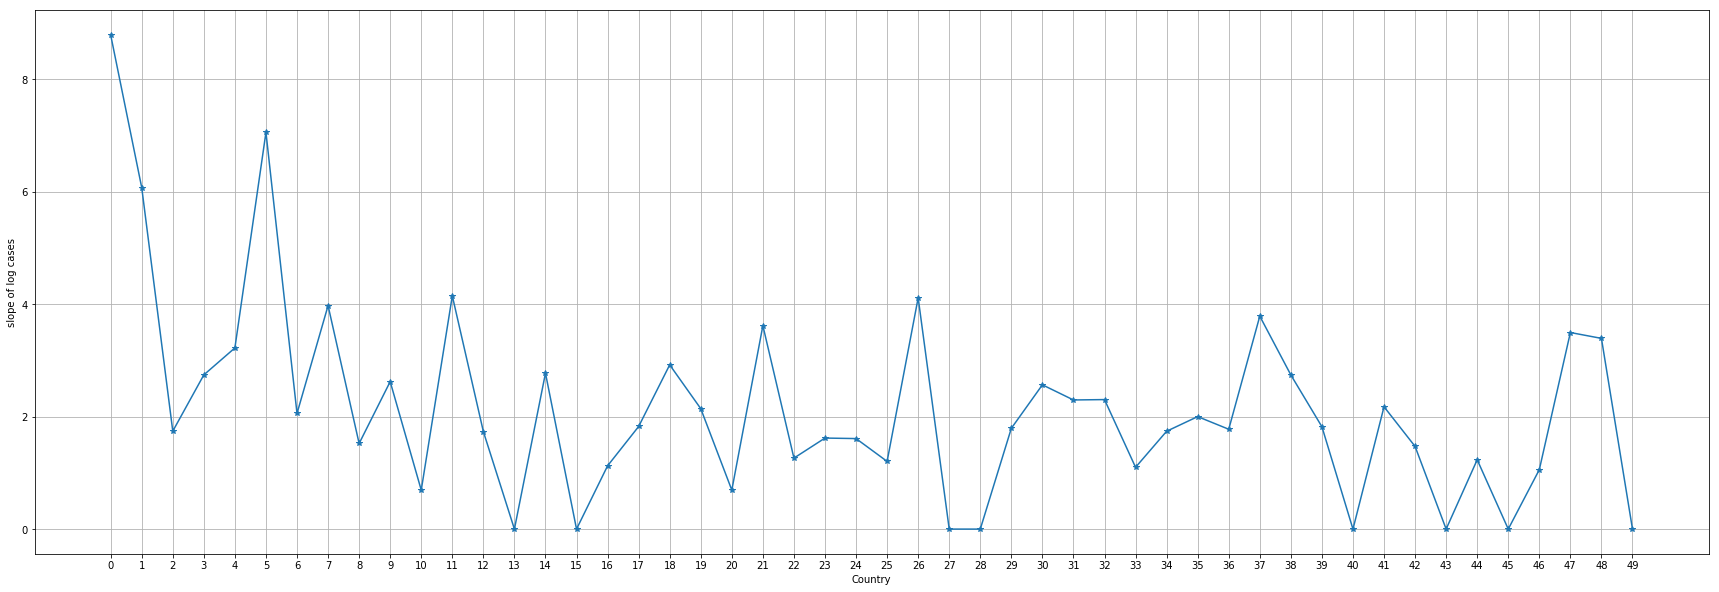

In [316]:
# recovered cases
calc_slopes(recovered_mat,thr=2,guess=0.1)

mean,median =  1.6392717869842721 1.5100493904721661


array([6.97671722, 5.25102819, 3.66164884, 4.3720006 , 2.45290151,
       4.58622526, 3.08672873, 3.39462136, 2.43903859, 2.86762861,
       2.82299507, 2.13451263, 1.5410799 , 1.50299238, 1.99977881,
       1.58832594, 1.5171064 , 2.11695734, 0.91286964, 1.20804869,
       1.99907931, 2.3628465 , 0.        , 0.        , 0.8451966 ,
       0.96345725, 1.65121044, 1.38629436, 1.56071041, 0.        ,
       1.3693173 , 1.65481814, 0.        , 1.01496203, 0.        ,
       1.60943791, 2.34340921, 0.69314718, 0.        , 0.        ,
       0.        , 0.        , 1.03909333, 1.3540251 , 2.33621983,
       0.        , 0.        , 0.        , 1.34715874, 0.        ])

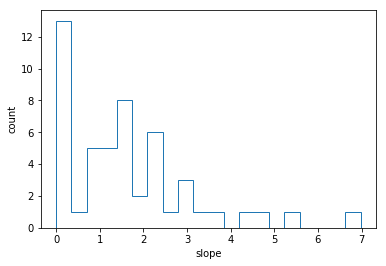

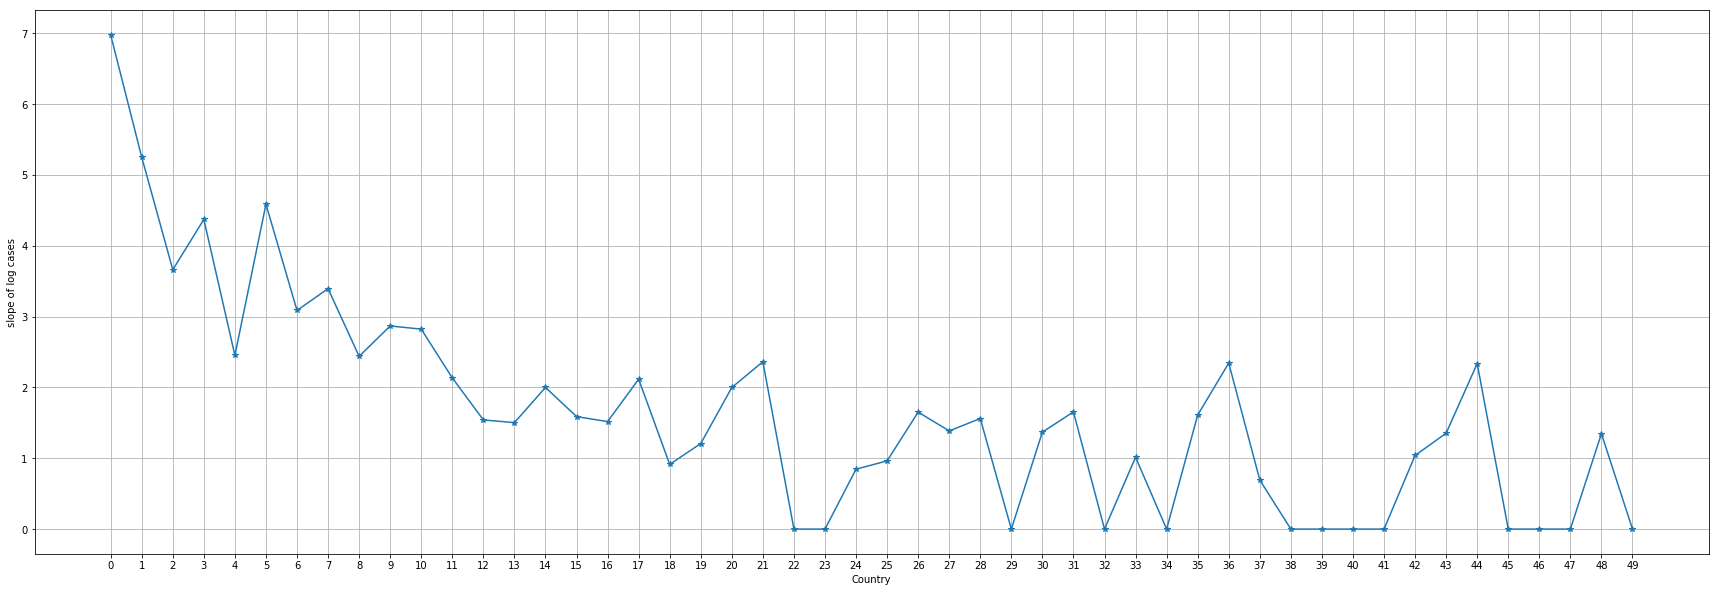

In [318]:
# deaths
calc_slopes(deaths_mat,thr=2,guess=0.1)

## Future Plans:
 Case studies on: Singapore, South Korea, Japan, Qatar for their low spread rate 
 
 Case studies on: Portugal, Pakistan, Luxembourg, Turkey, Chile for their high spread rate
 
 Case studies on: Bahrain, Romania, South Korea, China for their recovery rate.
 
 Fit slopes v/s : population density, temperature, humidity, economy, medical facilities, shutdown call, transport bans

In [329]:
np.savetxt('rates_top50.txt',slopes)

In [372]:
slopes_country = {}
slopes_country['Country']=top_affected_countries
slopes_country['slope']=slopes
#for i in range(50):
#    slopes_country[top_affected_countries[i]] = slopes[i] 

In [376]:
slopes_country=sorted(slopes_country.items(), key=lambda x: x[1])    

AttributeError: 'list' object has no attribute 'items'

In [375]:
slopes_country

[('Country',
  array(['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France',
         'Korea, South', 'Switzerland', 'United Kingdom', 'Netherlands',
         'Belgium', 'Austria', 'Norway', 'Sweden', 'Denmark', 'Portugal',
         'Canada', 'Malaysia', 'Australia', 'Brazil', 'Japan', 'Czechia',
         'Israel', 'Ireland', 'Pakistan', 'Cruise Ship', 'Luxembourg',
         'Turkey', 'Chile', 'Poland', 'Greece', 'Finland', 'Ecuador',
         'Qatar', 'Iceland', 'Indonesia', 'Singapore', 'Thailand',
         'Saudi Arabia', 'Slovenia', 'Romania', 'India', 'Peru',
         'Philippines', 'Estonia', 'Russia', 'Bahrain', 'Egypt',
         'South Africa'], dtype=object)),
 ('slope', array([0.06107447, 0.2175761 , 0.25425364, 0.29866959, 0.26531101,
         0.20989354, 0.24759947, 0.11564723, 0.25155231, 0.23790296,
         0.22311665, 0.22365171, 0.26933282, 0.21683176, 0.18843251,
         0.17013069, 0.31982136, 0.23474263, 0.19571626, 0.18652246,
         0.29359226, 0.0845576